# Loan Default Prediction

In [1]:
# data analysis libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('loan_default_train.csv')

In [3]:
sample=pd.read_csv('ld_sample_submissio.csv')
sample.head()

,loan_id,loan_default
0,7001,1
1,7002,1
2,7003,1
3,7004,1
4,7005,1


In [4]:
sample.loan_default.value_counts()

1    3000
Name: loan_default, dtype: int64

In [5]:
train

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6995,6996,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,6997,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,6998,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,6999,39,1.0,Aadhar,654708,793860,0,0,0,1


In [6]:
train.shape

(7000, 10)

In [7]:
train.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [9]:
train.education.nunique()

2

In [10]:
train.proof_submitted.value_counts()

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64

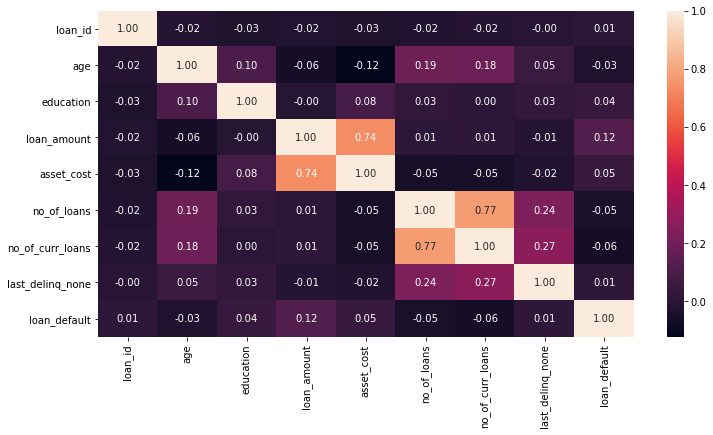

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), annot=True, fmt=".2f");

# Modeling

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
train.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [14]:
train=train.dropna()

In [15]:
# feature selection
X = train.drop(['loan_default','proof_submitted'], axis=1)
y=train.loan_default

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### RandomForestClassifier

In [17]:
# run the model without hyperparameters

rf =RandomForestClassifier()
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

print('Set 1')
print(classification_report(y_test,preds))

Set 1
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1618
           1       0.46      0.29      0.35      1084

    accuracy                           0.58      2702
   macro avg       0.54      0.53      0.52      2702
weighted avg       0.55      0.58      0.55      2702



The hyperparameters used in the following models were outputed from GridSearchCV in an earlier version of this notebook

In [18]:
# refit the model with parameters
clf = RandomForestClassifier(n_estimators=250,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=42)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [20]:
preds2 = clf.predict(X_test)

In [21]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.62      0.79      0.69      1618
           1       0.47      0.28      0.35      1084

    accuracy                           0.58      2702
   macro avg       0.54      0.53      0.52      2702
weighted avg       0.56      0.58      0.55      2702



### Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=700)

In [23]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=700)

In [24]:
preds3 = gb.predict(X_test)

In [25]:
print(classification_report(y_test,preds3)) 

              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1618
           1       0.45      0.28      0.35      1084

    accuracy                           0.57      2702
   macro avg       0.53      0.52      0.51      2702
weighted avg       0.55      0.57      0.55      2702



### Bagging classifier 

In [26]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=700)

In [27]:
bag.fit(X_train, y_train)

BaggingClassifier(n_estimators=700)

In [28]:
preds4 = bag.predict(X_test)

In [29]:
print(classification_report(y_test,preds4))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68      1618
           1       0.46      0.31      0.37      1084

    accuracy                           0.58      2702
   macro avg       0.54      0.53      0.53      2702
weighted avg       0.56      0.58      0.56      2702



### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr.fit(X_train,y_train)
preds5 = lr.predict(X_test)

In [31]:
print(classification_report(y_test,preds5))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1618
           1       0.20      0.00      0.00      1084

    accuracy                           0.60      2702
   macro avg       0.40      0.50      0.37      2702
weighted avg       0.44      0.60      0.45      2702



# Join the predictions with the original data using the bagging classifier model

In [32]:
# method 1
real_pred = bag.predict(X)
train2=train.copy()
train2['target'] = real_pred

In [33]:
train2.target.value_counts()

0    4391
1    2364
Name: target, dtype: int64

In [34]:
train2.shape

(6755, 11)

In [35]:
# method 2
train3=train.copy()
real_pred2 = bag.predict(X_test)
y_test['preds'] = real_pred2

train3 = pd.merge(train3,y_test[['preds']],how = 'left',left_index = True, right_index = True)

In [36]:
train3.head(1)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default_x,loan_default_y
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,NaN


now we have 2 datasets where our traget variable now has two classes each. Even though the proportions of class 1 against class 0 is close in train2 and train3, the target variable is still not balanced. This will be done using SMOTE.

## Balancing the target variable in train2 and train3 with SMOTE

In [37]:
train2.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default', 'target'],
      dtype='object')

In [38]:
train2.to_csv('ld_train2.csv',index=False)

In [39]:
train3.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default_x', 'loan_default_y'],
      dtype='object')

In [40]:
# feature selection train2
X2 = train2.drop(['loan_id','proof_submitted','loan_default','target'], axis=1)
y2=train2.target

# feature selection train3
X3 = train3.drop(['loan_id','proof_submitted','loan_default_x','loan_default_y'], axis=1)
y3=train3.loan_default_x

In [41]:
# split both train2 and train3 with train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, random_state=42)

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0) #instantiate smote

# balance train2
X2_train, y2_train = smote.fit_resample(X2_train, y2_train)

# balance train3
X3_train, y3_train = smote.fit_resample(X3_train, y3_train)

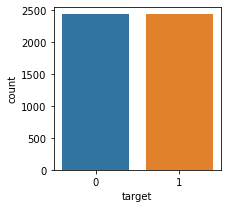

In [43]:
# plot value distribution of train2
plt.figure(figsize=(3,3))
sns.countplot(y2_train)
plt.show()

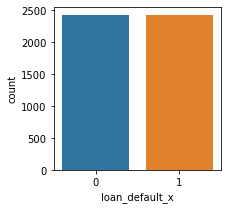

In [44]:
# plot value distribution of train3
plt.figure(figsize=(3,3))
sns.countplot(y3_train)
plt.show()

## Make predictions with bagging clasifier

In [45]:
# with train 2
bag2 = BaggingClassifier(n_estimators=700)

bag2.fit(X2_train, y2_train)
train2_preds = bag2.predict(X2_test)
print(classification_report(y2_test,train2_preds))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1958
           1       0.58      0.73      0.65       744

    accuracy                           0.78      2702
   macro avg       0.73      0.76      0.74      2702
weighted avg       0.80      0.78      0.79      2702



The macro f1-score increased to 74%

In [46]:
# with train 3
bag3 = BaggingClassifier(n_estimators=700)

bag3.fit(X3_train, y3_train)
train3_preds = bag3.predict(X3_test)
print(classification_report(y3_test,train3_preds))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1618
           1       0.45      0.38      0.41      1084

    accuracy                           0.56      2702
   macro avg       0.53      0.53      0.53      2702
weighted avg       0.55      0.56      0.55      2702



# Working with the testing data

In [47]:
test=pd.read_csv('loan_default_test.csv')

In [48]:
test.isnull().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [49]:
test.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
dtype: object

In [50]:
test['education'].fillna(test['education'].mode()[0], inplace=True)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   education         3000 non-null   float64
 3   proof_submitted   3000 non-null   object 
 4   loan_amount       3000 non-null   int64  
 5   asset_cost        3000 non-null   int64  
 6   no_of_loans       3000 non-null   int64  
 7   no_of_curr_loans  3000 non-null   int64  
 8   last_delinq_none  3000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 211.1+ KB


In [52]:
test.shape

(3000, 9)

In [53]:
data=test.copy()

In [54]:
data.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')

In [55]:
data=data.drop(['loan_id','proof_submitted'], axis=1)

In [56]:
test_predictions = bag2.predict(data)

In [57]:
loan_id = test['loan_id']
df=pd.DataFrame({"loan_id": loan_id, 
                 "loan_default": test_predictions})

In [58]:
df.head()

,loan_id,loan_default
0,7001,0
1,7002,0
2,7003,1
3,7004,1
4,7005,0


In [59]:
df.loan_default.value_counts()

0    1961
1    1039
Name: loan_default, dtype: int64

In [60]:
df.to_csv('ld_predictions.csv', index=False)